# Long Short Term Model 

## Importing Packages

The code cell imports necessary libraries and modules for building a Long Short-Term Memory (LSTM) neural network model using Keras for a predictive modeling task. Here's a breakdown of the imports and actions taken:

- `numpy` and `pandas` are imported for data manipulation.
- `train_test_split` from `sklearn.model_selection` is imported for splitting the dataset into training and testing sets.
- `StandardScaler` from `sklearn.preprocessing` is imported for feature scaling.
- `Sequential`, `LSTM`, `Dense`, and `Dropout` are imported from `keras.models` and `keras.layers` for building the LSTM model architecture.
- `Adam` is imported from `keras.optimizers` for setting up the optimization algorithm.
- `EarlyStopping` is imported from `keras.callbacks` for early stopping during model training.
- `matplotlib.pyplot` is imported for data visualization.
- `mean_absolute_error`, `r2_score` and `mean_squared_error` are imported from `sklearn.metrics` for evaluating model performance.

The current working directory path is printed using `os.getcwd()`.

This code sets up the environment and imports necessary tools for building an LSTM model, indicating that the subsequent code likely involves data preprocessing


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os

print(os.getcwd())

/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting


## Dataset Examination

In [ ]:
# colab
# from google.colab import drive

# drive.mount('/content/gdrive')
# data = pd.read_csv('gdrive/My Drive/data_nerual_network_models.csv')
# data.head()

In [18]:
# Load the dataset
data = pd.read_csv("./data/train-test/data_nerual_network_models.csv")

data.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,1.375097,103.837619,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,1.373922,103.855621,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,1.373552,103.838169,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,1.367761,103.855357,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,1.371626,103.857736,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


In [19]:
print(data.dtypes)

storey_range                           int64
resale_price                         float64
latitude                             float64
longitude                            float64
town_BEDOK                             int64
town_BISHAN                            int64
town_BUKIT BATOK                       int64
town_BUKIT MERAH                       int64
town_BUKIT PANJANG                     int64
town_BUKIT TIMAH                       int64
town_CENTRAL AREA                      int64
town_CHOA CHU KANG                     int64
town_CLEMENTI                          int64
town_GEYLANG                           int64
town_HOUGANG                           int64
town_JURONG EAST                       int64
town_JURONG WEST                       int64
town_KALLANG/WHAMPOA                   int64
town_MARINE PARADE                     int64
town_PASIR RIS                         int64
town_PUNGGOL                           int64
town_QUEENSTOWN                        int64
town_SEMBA

## Data Preprocessing and Splitting

This section preprocesses the data by normalizing numerical features and splitting the dataset into training, validation, and test sets. It also converts the data into numpy arrays for model training. Finally, it prints the data types and shapes of the training and validation sets for confirmation.

In [21]:
# Normalize numerical features
scaler = StandardScaler()
data[['floor_area_sqm', 'remaining_lease', 'sora', 'bto_supply_within_4km', 'distance2cbd']] = scaler.fit_transform(data[['floor_area_sqm', 'remaining_lease', 'sora', 'bto_supply_within_4km', 'distance2cbd']])

In [22]:
# Split dataset into features and target
X = data.drop(columns=['resale_price'])
y = data['resale_price']

In [23]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [24]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("X_val dtype:", X_val.dtype)
print("y_val dtype:", y_val.dtype)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train dtype: float64
y_train dtype: float64
X_val dtype: float64
y_val dtype: float64
X_train shape: (144420, 49)
y_train shape: (144420,)
X_val shape: (30947, 49)
y_val shape: (30947,)


## LSTM Model Training

This section encompasses the training and evaluation of a Long Short-Term Memory (LSTM) neural network model for a predictive task. The LSTM model is constructed with three layers, each followed by dropout regularization to mitigate overfitting. The model is compiled using the Adam optimizer and mean squared error loss function. Early stopping is employed with a patience of 5 to monitor validation loss and prevent overfitting during training. The training process involves fitting the model to the training data for 100 epochs with a batch size of 32 and validating it on the validation set.

In [9]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

/Users/javian/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stop])

Epoch 1/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 126s 28ms/step - loss: 5.6379 - val_loss: 0.1080
Epoch 2/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 115s 25ms/step - loss: 0.8661 - val_loss: 0.0740
Epoch 3/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.6261 - val_loss: 0.0248
Epoch 4/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 122s 27ms/step - loss: 0.4752 - val_loss: 0.0309
Epoch 5/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.3481 - val_loss: 0.0325
Epoch 6/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.2413 - val_loss: 0.0182
Epoch 7/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 118s 26ms/step - loss: 0.1636 - val_loss: 0.0172
Epoch 8/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 121s 27ms/step - loss: 0.1028 - val_loss: 0.0173
Epoch 9/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 117s 26ms/step - loss: 0.0621 - val_loss: 0.0157
Epoch 10/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 117s 26ms/step - loss: 0.0365 - val_loss: 0.0142
Epoch 11/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 116s 26ms/step - loss: 0.0228 - val

## Save ML Model

In [11]:
model.save("trained_lstm_model.keras")

## Load ML Model

To be used on notebook reset to use the trained model.

In [28]:
# Load the saved model
model = load_model("./trained_lstm_model.keras")

# Optionally, you can check the summary of the loaded model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 49, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 49, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 49, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

## Model Evaluation on Test Set

In [26]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

968/968 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0071
Test Loss: 0.007138872519135475


In [35]:
# Make predictions
predictions = model.predict(X_test)

968/968 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


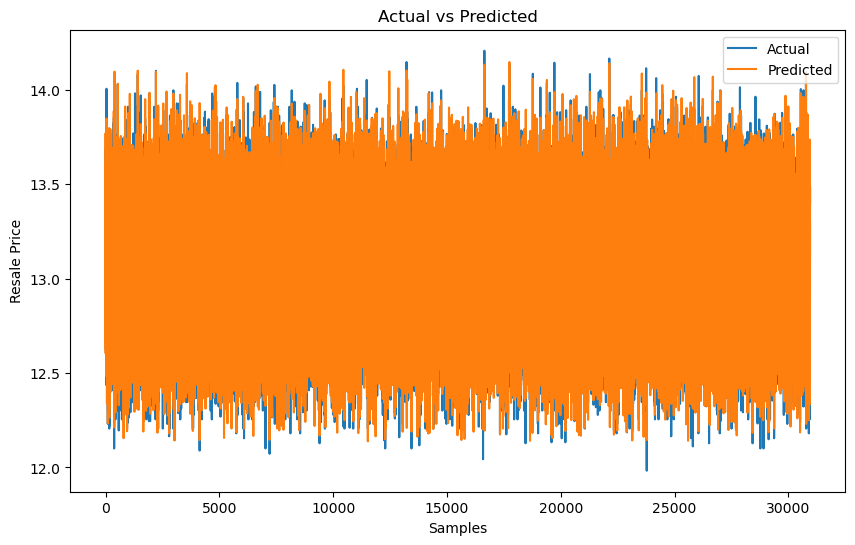

In [36]:
# Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

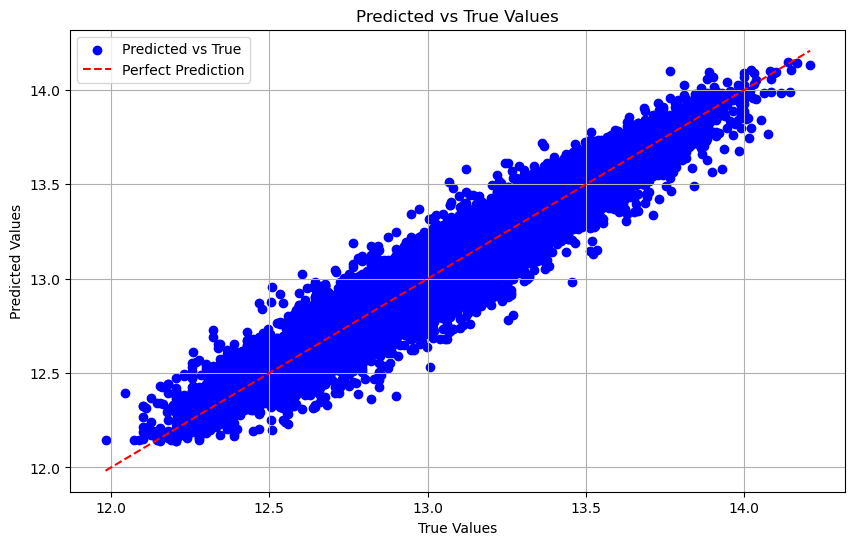

R² Score: 0.93
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08
Mean Absolute Percentage Error (MAPE): 2.89%


In [37]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print("R² Score: {:.2f}".format(r2))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

#### Evaluation
It seems that there is a wider dispersion of predicted values around the true values within the range of 12.75 to 13.25. This might be attributed to the presence of a greater number of data points falling within that interval.

## Model Evaluation on New Dataset

### New Dataset Examination

In [10]:
test_data = pd.read_csv('./data/train-test/2024-data.csv')
test_data.head()

,storey_range,resale_price,latitude,longitude,year,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.570716,1.373346,103.836459,2024,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,12.683858,1.373401,103.849073,2024,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,0,13.161584,1.365266,103.844538,2024,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,8,13.384728,1.365266,103.844538,2024,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,1,12.747815,1.366048,103.838123,2024,0,0,0,0,0,...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [11]:
print(test_data.dtypes)

storey_range                           int64
resale_price                         float64
latitude                             float64
longitude                            float64
year                                   int64
town_BEDOK                             int64
town_BISHAN                            int64
town_BUKIT BATOK                       int64
town_BUKIT MERAH                       int64
town_BUKIT PANJANG                     int64
town_BUKIT TIMAH                       int64
town_CENTRAL AREA                      int64
town_CHOA CHU KANG                     int64
town_CLEMENTI                          int64
town_GEYLANG                           int64
town_HOUGANG                           int64
town_JURONG EAST                       int64
town_JURONG WEST                       int64
town_KALLANG/WHAMPOA                   int64
town_MARINE PARADE                     int64
town_PASIR RIS                         int64
town_PUNGGOL                           int64
town_QUEEN

### Model Evaluation

In [12]:
# Assuming X_2040 and y_2040 are your preprocessed features and target for the 2040-data.csv file
X_2040 = test_data.drop(columns=['resale_price'])
y_2040 = test_data['resale_price']

# Predict prices using the trained model
predicted_prices = model.predict(X_2040)

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


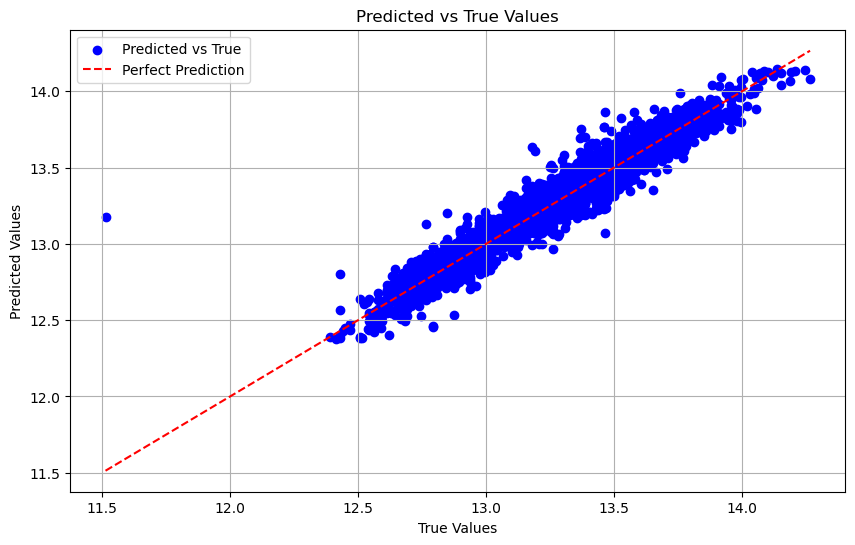

R² Score: 0.94
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
Mean Absolute Percentage Error (MAPE): 2.58%


In [13]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

r2 = r2_score(y_2040, predicted_prices)
mae = mean_absolute_error(y_2040, predicted_prices)
mse = mean_squared_error(y_2040, predicted_prices)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_2040, predicted_prices)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_2040, predicted_prices, color='blue', label='Predicted vs True')
plt.plot([min(y_2040), max(y_2040)], [min(y_2040), max(y_2040)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print("R² Score: {:.2f}".format(r2))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

#### Evaluation

It seems that there is a more uniform dispersion of predicted values around the perfect prediction. There are however a few outlier points that can be found on the chart such as one at 11.5 true value but with a high predicted value at 13.25. 